## Clustered Demand Planning Accuracy


### Background: A Challenging Scenario

All companies face a strategic challenge while trying to find ways to prevale in the marketplace. The driving forces of the market evolve and change at a fast pace, and it's easy to get lost in the ocean of possibilities to define a path to grow profitably: Portfolio innovation or renovation? Pricing to compete through value or target niche market? Develop a single channel or deploy an omnichannel presence? Invest heavily in marketing or drive infraestructure for cost reduction?...And the list continues, with multiple answers which seem to be equally valid.

At the end, all companies make a choice and the strategy is materialized in a specific portfolio, with a defined number of customers that will be served through a specific pricing strategy and from which the supply chain will be alligned to have the products required readiliy available at the right place in the right time at the most efficiet cost to maximize profitability. At this point it all depends on a single set of numbers which are shared by all functions and from which the detection of risks and opportunities for the chosen strategy are more clear and are identified with good timing. The single set of numbers is called the __sales forecast__ and the process which makes this business allignment a reality is the __"Sales and Operations Planning Process": S&OP__.  

Further references to develop a strategy approach using HBR's "playing to win" framework [can be found here](https://hbr.org/books/playing-to-win). Regarding S&OP and integrated business planning, [you will find this page from Oliver Wight very illustrative.](http://www.oliverwight-americas.com/white-papers-and-articles)


### The Opportunity: A Capable Demand Planning

It is critical to remember that _one of the key reasons why the S&OP process to exist_ is to fulfill the customers' needs, and is clear that in any FMCG one of the biggest causes of failures in customer service are related to _demand forecast inaccuracy_. Both growth and profitability are compromised when the forecast is build through poor planning principles, as it creates a systemic bias which drains resources to higher costs, unnecessary inventories, and missed opportunities to grow with strategic customers. 

The solution to this challenge is to create a Demand Plan, defined as _"The best knowledge at a point in time about the expected volume requirements of all customers in a market, over a pre-defined time horizon."_ To note, the level of maturity of the Demand Planning function spans across the following stages:
- Basic Forecasting: No customer input, Planner acts in isolation Value,  forecast in "$"
- Basic Demand Planning: Forecast drives internal Supply Chain Planner has sales & Mkting input
- Capable Demand Planning: Sales own the process & plan, broad range of assumptions used, bias has been eliminated
- Demand Management: Customer assumption driven, customer linkage is major input, Plans span End to End Supply Chain
- Integrated Demand Management: Assumptions used to drive activity, CPFR in place & functioning, Plans drive End to End S.C.

Addressing the challenge of creating a demand planning process which delivers a __Capable Demand Planning__ will translate into delivering periodic Sales Forecast Accuracy (SFA) >75% and eliminating structural bias.




### The Problem to be Solved: 
#### __How  to deliver a consensus demand plan that enables the whole organisation to deliver the expected growth and customer service levels?__

We have embraced this challenge and identified the key components to solve this problem. We defined a collaborative planning process which includes a continuous improvement routine that evaluates the accuracy of the forecast, and then is translated to increased refinment in the assumptions base. 

__Hypthesis 1__: Demand plan accuracy will changes proportionally to the number of items (size of the portfolio) in each customer. e.g.: large portfolio will create a degradation of the accuracy, therefore there is an optimum portfolio size to maximize forecast accuracy

__Hypothesis 2__: Demand plan accuracy changes according to the seasonality. High consumption drives a different velocity of our items at the customer's shelf, therefore the planning basis and components of the plan have to be intified and adjusted depending on the time of the year

__Hypothesis 3__: Demand plan accuracy has a set of clusters which relate the customer type and / or other factors which impact the forecast accuracy of any given combinaion of item / customer

### Objective of this Project

__In this project I will analyze the our forecast accuracy and how it has evolved from the last month of 2018 until Q3 2019__

As this is my capstone project for the UDACITY Data Scientist for nterprise Nano Degree, I will follow these steps to analyze the data:
1. ETL Routines: from Excel files spanning across several points in time to generate a single data set with dummy variables to analyze precision 
2. Data Visualization: displaying through different visuals the compositon of the dataset
3. Clustering Selection and Tunning: test the proposed hypothesis and complement using different clusters derived from this information, and its relation to the different levels of forecast accuracy achieved for each cluster
4. Conclusions: Generate insights from the clustering and data visualization in order to adjust the demand planning process.Leverage on PCA for the dataset and compare the analyticial conclusions with this unsupervised technique.

__NOTE ON CONFIDENTIALITY: To preserve the confidentiality of the sales forecast of the company subject of study, all data has been multiplied by a factor "k" which is not disclosed in this notebook, and the names of items, brands and sales channels have been replaced by non-descriptive labels, hence all conclusions will remain valid from the analytical and dimensionality perspective.__


In [95]:
# import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
import seaborn as sns

from scipy.stats import itemfreq, chisquare
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Load in the forecast accuracy data 2018 and 2019
#reference: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_excel.html#pandas.read_excel

df_SFA = pd.read_excel('SFA Data Source v5.xlsx')

In [3]:
 df_SFA.head()

,SFA Data for 2018 and 2019.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,By demand unit and customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Descr,Tipo,Conv,Brand,...,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
3,2019,P01,LuW,LuW,Cst30,20,Item 152,Other,0,Brnd 37,...,0.0464999,0,0.0590742,0.154485,0.0590742,0.154485,1,1,0,0
4,2019,P01,LuW,LuW,Cst30,23,Item 153,Other,0,Brnd 37,...,0.0628835,0,0.0590742,0.208915,0.0590742,0.208915,1,1,0,0


As it is shown, the data comes with a header that describes its content in the first rows. Modifying the reading instruction to skip initial rows:

In [4]:
df_SFA = pd.read_excel('SFA Data Source v5.xlsx', skiprows=3)

In [5]:
df_SFA.head(8)

,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Descr,Tipo,Conv,Brand,...,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
0,2019,P01,LuW,LuW,Cst30,20,Item 152,Other,0.0,Brnd 37,...,0.046500,0.000000,0.059074,0.154485,0.059074,0.154485,1.000000,1.000000,0.000000,0.000000
1,2019,P01,LuW,LuW,Cst30,23,Item 153,Other,0.0,Brnd 37,...,0.062884,0.000000,0.059074,0.208915,0.059074,0.208915,1.000000,1.000000,0.000000,0.000000
2,2019,P01,LuW,LuW,Cst30,31,Item 335,Other,0.0,Brnd 37,...,0.895270,0.780192,0.177101,0.382320,0.177101,0.382320,0.063956,0.128540,0.936044,0.871460
3,2019,P01,LuW,LuW,Cst30,32,Item 334,Core,NaN,Brnd 37,...,1.027903,0.650160,1.162921,1.254960,1.162921,1.254960,0.349970,0.367489,0.650030,0.632511
4,2019,P01,LuW,LuW,Cst30,33,Item 340,Other,NaN,Brnd 37,...,0.582763,0.632100,0.561611,0.163910,-0.561611,-0.163910,-0.365064,-0.084660,0.634936,0.915340
5,2019,P01,LuW,LuW,Cst30,36,Item 363,Other,NaN,Brnd 37,...,0.865198,0.404544,2.348135,1.530411,2.348135,1.530411,0.635983,0.532426,0.364017,0.467574
6,2019,P01,LuW,LuW,Cst30,37,Item 343,Other,NaN,Brnd 37,...,0.380672,0.433440,0.209288,0.175309,-0.209288,-0.175309,-0.170055,-0.138618,0.829945,0.861382
7,2019,P01,LuW,LuW,Cst30,40,Item 382,Other,NaN,Brnd 37,...,0.774509,0.328692,2.292457,1.481120,2.292457,1.481120,0.677349,0.575613,0.322651,0.424387


Investigate the shape of the information, including the type of data and the "emptiness" of the records contained in the data:

In [6]:
num_rows, num_cols  = df_SFA.shape

print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 26
Number of rows: 67492


In [7]:
print(df_SFA.shape)
print(df_SFA.info())

(67492, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67492 entries, 0 to 67491
Data columns (total 26 columns):
Year          67492 non-null int64
Per           67492 non-null object
Canal         67492 non-null object
Ch            67492 non-null object
Gpo_Plan      67492 non-null object
Dmd_Unit      67492 non-null int64
Descr         67492 non-null object
Tipo          67492 non-null object
Conv          13 non-null float64
Brand         67492 non-null object
Sub_Fam       67492 non-null object
Buss          67492 non-null object
P_1C          67492 non-null float64
P_3C          67492 non-null float64
Fac_C         67492 non-null float64
P_1T          67492 non-null float64
P_3T          67492 non-null float64
Fac_T         67492 non-null float64
Abs_Er_P_1    67492 non-null float64
Abs_Er_P_3    67492 non-null float64
Er_P_1        67492 non-null float64
Er_P_3        67492 non-null float64
Bias_P_1      67492 non-null float64
Bias_P_3      67492 non-null float64
SFA_P_1

The numeric fields of the dataframe are characterized below:

In [8]:
df_SFA.describe()

,Year,Dmd_Unit,Conv,P_1C,P_3C,Fac_C,P_1T,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
count,67492.000000,67492.000000,13.0,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000
mean,2018.521617,448.073787,0.0,94.951166,93.776296,88.054984,0.372625,0.370405,0.345204,0.455897,0.522263,0.091102,0.083724,0.009651,-0.029949,0.077632,-0.003390
std,0.499536,356.919200,0.0,353.977101,351.342765,330.583526,1.328672,1.360440,1.268777,1.345127,1.595684,1.417361,1.676890,6.203937,6.481482,6.134995,6.403413
min,2018.000000,1.000000,0.0,-144.480000,-983.591442,-3746.246000,-0.386340,-0.584253,-12.348099,0.000000,0.000000,-54.862356,-48.231915,-959.466498,-959.466498,-958.466498,-958.466498
25%,2018.000000,146.000000,0.0,1.505000,1.446798,0.602000,0.006491,0.005871,0.001941,0.017905,0.021781,-0.056760,-0.069002,-0.159658,-0.158489,0.000000,0.000000
50%,2019.000000,359.500000,0.0,12.040000,11.594211,10.535000,0.052324,0.050318,0.042111,0.090000,0.101280,0.000000,0.000000,0.340000,0.394263,0.329755,0.257143
75%,2019.000000,692.000000,0.0,55.719369,53.892812,50.568000,0.233487,0.224413,0.209496,0.340000,0.380107,0.125005,0.136104,1.000000,1.000000,0.736842,0.704999
max,2019.000000,1363.000000,0.0,14152.117000,12346.117000,10720.717000,69.401941,69.401941,60.219027,62.091059,58.919364,62.091059,58.919364,104.661672,104.661672,7.900000,35.748108


The field "Conv" contains only 13 records with data different to "0", as a way for sanity check the next instruction will show how many records are different to "0":

In [9]:
print(df_SFA.isnull().sum())

Year              0
Per               0
Canal             0
Ch                0
Gpo_Plan          0
Dmd_Unit          0
Descr             0
Tipo              0
Conv          67479
Brand             0
Sub_Fam           0
Buss              0
P_1C              0
P_3C              0
Fac_C             0
P_1T              0
P_3T              0
Fac_T             0
Abs_Er_P_1        0
Abs_Er_P_3        0
Er_P_1            0
Er_P_3            0
Bias_P_1          0
Bias_P_3          0
SFA_P_1           0
SFA_P_3           0
dtype: int64


I will drop this column in the dataframe, as it is clear that it won't add any value to the clusterization analysis. Additionally, I will drop as well the columns "P_1C", "P_3C" and "Fac_C" as they contain data in cases nstead of kilograms, and all the parameters related to forecast error are calculated in kilograms

In [10]:
df_SFA = df_SFA.drop(['Conv', 'P_1C', 'P_3C', 'Fac_C'], axis=1)

#sanity check:
df_SFA.describe()

,Year,Dmd_Unit,P_1T,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
count,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000,67492.000000
mean,2018.521617,448.073787,0.372625,0.370405,0.345204,0.455897,0.522263,0.091102,0.083724,0.009651,-0.029949,0.077632,-0.003390
std,0.499536,356.919200,1.328672,1.360440,1.268777,1.345127,1.595684,1.417361,1.676890,6.203937,6.481482,6.134995,6.403413
min,2018.000000,1.000000,-0.386340,-0.584253,-12.348099,0.000000,0.000000,-54.862356,-48.231915,-959.466498,-959.466498,-958.466498,-958.466498
25%,2018.000000,146.000000,0.006491,0.005871,0.001941,0.017905,0.021781,-0.056760,-0.069002,-0.159658,-0.158489,0.000000,0.000000
50%,2019.000000,359.500000,0.052324,0.050318,0.042111,0.090000,0.101280,0.000000,0.000000,0.340000,0.394263,0.329755,0.257143
75%,2019.000000,692.000000,0.233487,0.224413,0.209496,0.340000,0.380107,0.125005,0.136104,1.000000,1.000000,0.736842,0.704999
max,2019.000000,1363.000000,69.401941,69.401941,60.219027,62.091059,58.919364,62.091059,58.919364,104.661672,104.661672,7.900000,35.748108


A heat map can also help to clarify the different correlation between variables within the dataset. To note: at this point there is a number of parameters that are alfa-numeric, and therefore the correlation will not show these variables

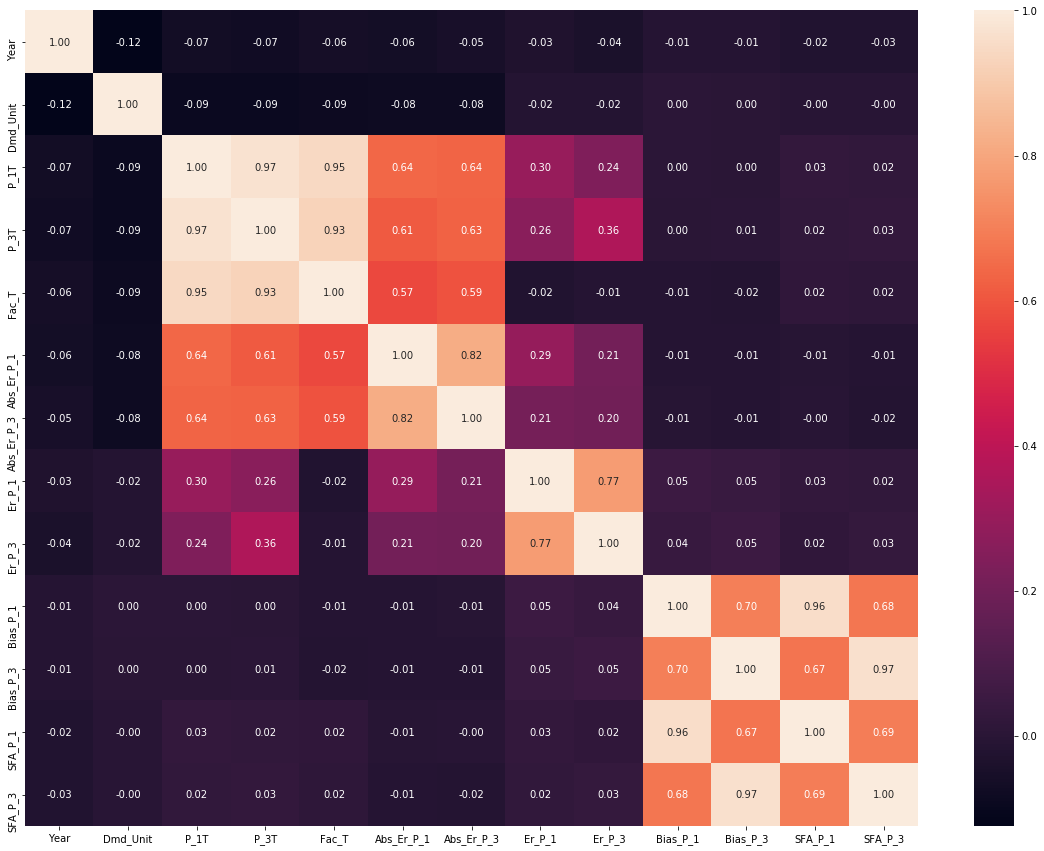

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_SFA.corr(), annot = True, fmt = '.2f');

The previous heatmap show a high correlation between the invoice ("Fact") of a particular item and the absolute error of the forecast of this item one period before ("ABS ERROR P-1"). These relations only cnsider those variables that are numerical.

The following analysis explore those variables which are non-numerical:

1) Understand the relative size of the groups contained in the dataset

In [12]:
df_SFA.groupby(['Buss']).sum()['Fac_T'].sort_values()/1000

Buss
Conf 5     0.008946
Conf 2     1.028469
Conf 3     2.958917
Conf 4     5.672485
Conf 1    13.629674
Name: Fac_T, dtype: float64

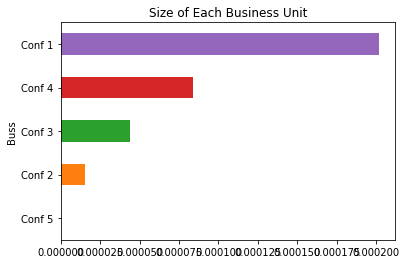

In [13]:
 #bar chart
status_vals_1 = df_SFA.groupby(['Buss']).sum()['Fac_T'].sort_values()/1000
(status_vals_1/df_SFA.shape[0]).plot(kind="barh");
plt.title("Size of Each Business Unit");

In [14]:
#characterization of the error value from P-1
df_SFA.groupby(['Buss']).mean()['Er_P_1'].sort_values()*100

Buss
Conf 3     1.680219
Conf 5     7.736657
Conf 2     8.201696
Conf 1     9.370263
Conf 4    13.683057
Name: Er_P_1, dtype: float64

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Side-by-Side Histogram by Business Unit')

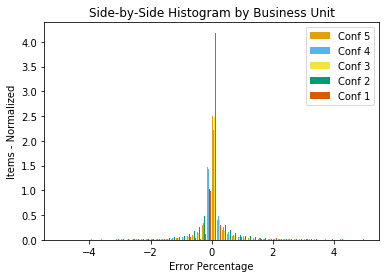

In [15]:
# matplotlib histogram for the forecast error (P-1) in each business unit 
#make a list for each dataseries for each bussiness segment

x1 = list(df_SFA[df_SFA['Buss'] == 'Conf 1']['Er_P_1'])
x2 = list(df_SFA[df_SFA['Buss'] == 'Conf 2']['Er_P_1'])
x3 = list(df_SFA[df_SFA['Buss'] == 'Conf 3']['Er_P_1'])
x4 = list(df_SFA[df_SFA['Buss'] == 'Conf 4']['Er_P_1'])
x5 = list(df_SFA[df_SFA['Buss'] == 'Conf 5']['Er_P_1'])

# Assign colors for each dataset
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Conf 5', 'Conf 4', 'Conf 3', 'Conf 2', 'Conf 1']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/3), range=(-5, 5), cumulative=False, normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Error Percentage')
plt.ylabel('Items - Normalized')
plt.title('Side-by-Side Histogram by Business Unit')


From the previous result, it is clear that different groups of items have a different weight in the dataset, and the accuracy of each group varies considerably (from 1.6% to 13.7% for the groups "Conf 3" and "Conf 4" respectively). Having said that, the forecast error shows a clear trend towards the central point in the normal distribution

In [16]:
df_SFA.groupby(['Canal']).sum()['Fac_T'].sort_values()

Canal
ChB     170.672048
NTx     940.339616
LuW    1187.746140
DDS    2100.093724
FdS    3962.805867
WhS    6775.296554
Mdn    8161.535359
Name: Fac_T, dtype: float64

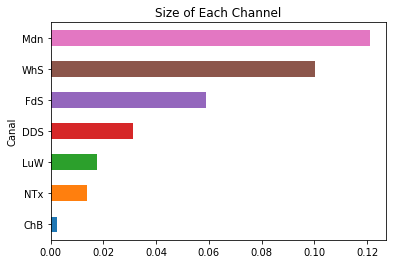

In [17]:
 #bar chart
status_vals_2 = df_SFA.groupby(['Canal']).sum()['Fac_T'].sort_values()

(status_vals_2/df_SFA.shape[0]).plot(kind="barh");

plt.title("Size of Each Channel");

In [18]:
df_SFA.groupby(['Canal']).mean()['Er_P_1'].sort_values()*100


Canal
ChB    -0.104459
NTx     2.333276
LuW     3.787825
Mdn     9.944097
FdS    10.388290
WhS    12.358866
DDS    16.054181
Name: Er_P_1, dtype: float64

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\numpy\lib\histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5,1,'Side-by-Side Histogram by Sales Channel')

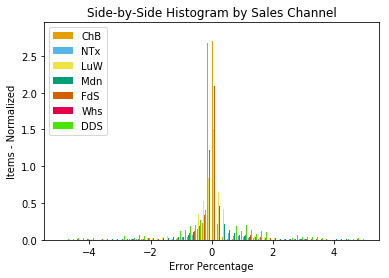

In [19]:
# matplotlib histogram for the forecast error (P-1) in each sales channel
#make a list for each dataseries for each bussiness segment

x1 = list(df_SFA[df_SFA['Canal'] == 'ChB']['Er_P_1'])
x2 = list(df_SFA[df_SFA['Canal'] == 'NTx']['Er_P_1'])
x3 = list(df_SFA[df_SFA['Canal'] == 'LuW']['Er_P_1'])
x4 = list(df_SFA[df_SFA['Canal'] == 'Mdn']['Er_P_1'])
x5 = list(df_SFA[df_SFA['Canal'] == 'FdS']['Er_P_1'])
x6 = list(df_SFA[df_SFA['Canal'] == 'Whs']['Er_P_1'])
x7 = list(df_SFA[df_SFA['Canal'] == 'DDS']['Er_P_1'])

# Assign colors for each dataset
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#E60047', '#47E600']
names = ['ChB', 'NTx', 'LuW', 'Mdn', 'FdS', 'Whs','DDS']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7], bins = int(180/3), range=(-5, 5), cumulative=False, normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Error Percentage')
plt.ylabel('Items - Normalized')
plt.title('Side-by-Side Histogram by Sales Channel')


From the previous result it is possible to see the differences in the size of the sales channels and how iths forecast error changes across them (from -0.1% to 16% for the channels "ChB" and "DDS" respectively). _It is iportant to note that the largest channels do not have the highest forecast error_

The dataset contains a number of variables that are non-numerical. In order to test the hypothesis it is necessary to transform these labels using a label encoding procedure as follow:

In [20]:
#identify the unique variables contained in the field "Per"
df_SFA['Per'].unique() 

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13'], dtype=object)

In [21]:
le_1 = preprocessing.LabelEncoder()

In [22]:
# Encode labels in column 'Period'. 
df_SFA['Per']= le_1.fit_transform(df_SFA['Per']) 

In [23]:
#sanity check to verify that the transformation from labels to numbers took place:
df_SFA['Per'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [24]:
df_SFA.head()

,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Descr,Tipo,Brand,Sub_Fam,...,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
0,2019,0,LuW,LuW,Cst30,20,Item 152,Other,Brnd 37,SBrd 22,...,0.046500,0.000000,0.059074,0.154485,0.059074,0.154485,1.000000,1.000000,0.000000,0.000000
1,2019,0,LuW,LuW,Cst30,23,Item 153,Other,Brnd 37,SBrd 22,...,0.062884,0.000000,0.059074,0.208915,0.059074,0.208915,1.000000,1.000000,0.000000,0.000000
2,2019,0,LuW,LuW,Cst30,31,Item 335,Other,Brnd 37,SBrd 33,...,0.895270,0.780192,0.177101,0.382320,0.177101,0.382320,0.063956,0.128540,0.936044,0.871460
3,2019,0,LuW,LuW,Cst30,32,Item 334,Core,Brnd 37,SBrd 33,...,1.027903,0.650160,1.162921,1.254960,1.162921,1.254960,0.349970,0.367489,0.650030,0.632511
4,2019,0,LuW,LuW,Cst30,33,Item 340,Other,Brnd 37,SBrd 48,...,0.582763,0.632100,0.561611,0.163910,-0.561611,-0.163910,-0.365064,-0.084660,0.634936,0.915340


Repeat the process of label encoding for those variables that will be investigated. To note: using the _one hot encoding_ would be an option but it may be interfering in the precision of the analysis to prove the hypothesis presented before.
1. Year
2. Per: _already done_
3. Canal: Sales Channel
4. Ch: Sub-Channel
5. Gpo_Plan: Customer
6. Tipo: Portfolio type
7. Buss: Business segment of the item
8. Dmd_Unit: Code of each item
9. Descr: will be dropped, as it is a redundant variable with the "Dmd_Unit"
10. Brand: Brand to which the item belongs
11. Sub_Fam: Sub-Brand to which the item belongs

In [25]:
le_0 = preprocessing.LabelEncoder()
df_SFA['Year']= le_0.fit_transform(df_SFA['Year']) 

le_2 = preprocessing.LabelEncoder()
df_SFA['Canal']= le_2.fit_transform(df_SFA['Canal']) 

le_3 = preprocessing.LabelEncoder()
df_SFA['Ch']= le_3.fit_transform(df_SFA['Ch']) 

le_4 = preprocessing.LabelEncoder()
df_SFA['Gpo_Plan']= le_4.fit_transform(df_SFA['Gpo_Plan']) 

le_5 = preprocessing.LabelEncoder()
df_SFA['Tipo']= le_5.fit_transform(df_SFA['Tipo']) 

le_6 = preprocessing.LabelEncoder()
df_SFA['Buss']= le_6.fit_transform(df_SFA['Buss']) 

le_7 = preprocessing.LabelEncoder()
df_SFA['Dmd_Unit']= le_7.fit_transform(df_SFA['Dmd_Unit']) 

le_8 = preprocessing.LabelEncoder()
df_SFA['Brand']= le_8.fit_transform(df_SFA['Brand'])

le_9 = preprocessing.LabelEncoder()
df_SFA['Sub_Fam']= le_9.fit_transform(df_SFA['Sub_Fam'])

In [26]:
#sanity check for the dataset to be transformed to numerical:
df_SFA = df_SFA.drop(['Descr'], axis=1)
df_SFA.head()

,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Tipo,Brand,Sub_Fam,Buss,...,P_3T,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3
0,1,0,3,8,23,19,2,30,14,3,...,0.046500,0.000000,0.059074,0.154485,0.059074,0.154485,1.000000,1.000000,0.000000,0.000000
1,1,0,3,8,23,22,2,30,14,3,...,0.062884,0.000000,0.059074,0.208915,0.059074,0.208915,1.000000,1.000000,0.000000,0.000000
2,1,0,3,8,23,30,2,30,26,3,...,0.895270,0.780192,0.177101,0.382320,0.177101,0.382320,0.063956,0.128540,0.936044,0.871460
3,1,0,3,8,23,31,0,30,26,3,...,1.027903,0.650160,1.162921,1.254960,1.162921,1.254960,0.349970,0.367489,0.650030,0.632511
4,1,0,3,8,23,32,2,30,42,3,...,0.582763,0.632100,0.561611,0.163910,-0.561611,-0.163910,-0.365064,-0.084660,0.634936,0.915340


Having the dataset transformed from strings to numerical, the heatmap will present more interesting results:

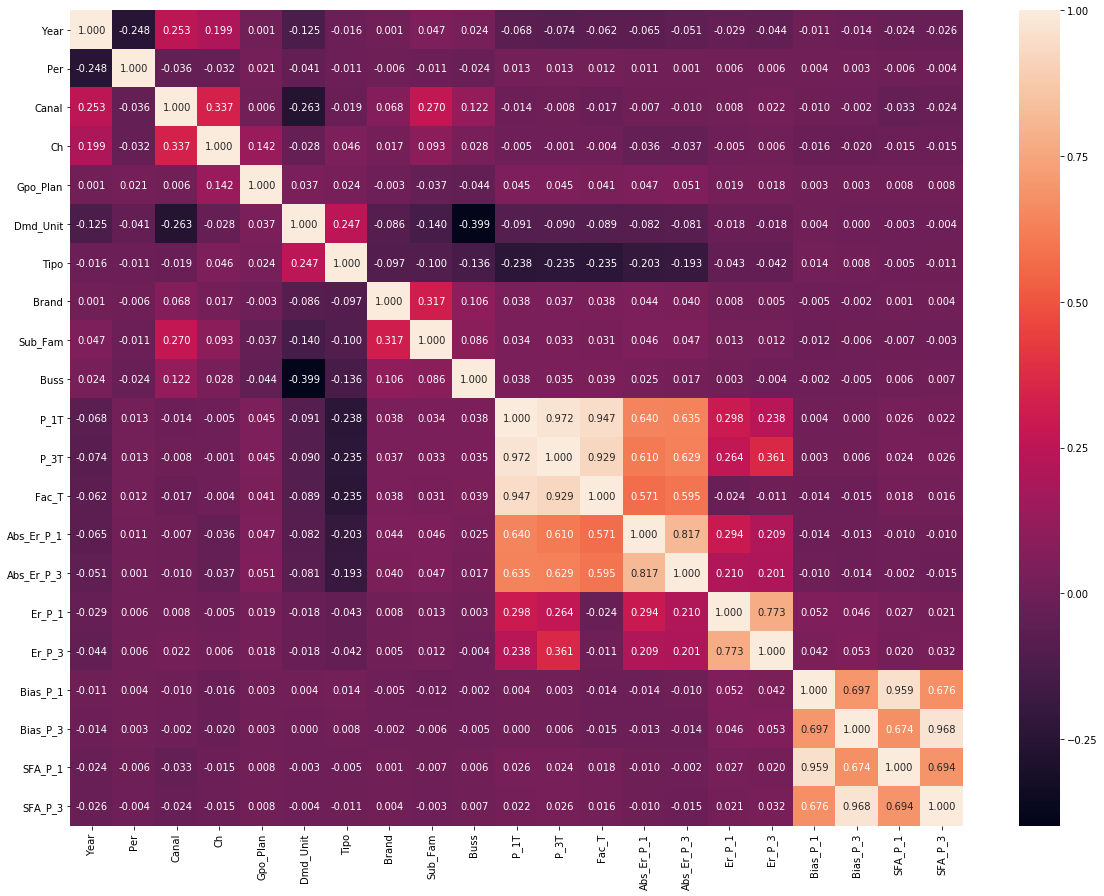

In [27]:
plt.subplots(figsize=(20,15)) #ncrease the size of the chart to visualize properly
sns.heatmap(df_SFA.corr(), annot = True, fmt = '.3f');

Comments from heatmap:

COMPLEMENTAR AQUÍ



### Hypothesis 1 ##
Having finished the data exploration and wrangling, it's time now to start proving the hypothesis. The first one is to demonstrate the relation between the number of items ("Dmd_Unit") in each customer ("Gpo_Plan"). e.g.: large portfolio will create a degradation of the accuracy, therefore there might exist an optimum portfolio size to maximize forecast accuracy

In [28]:
#Re-define a dataframe with those variables that will be analyzed for Hipothesys 1
df_H1 = df_SFA[['Gpo_Plan','Dmd_Unit','Abs_Er_P_1','Abs_Er_P_3','Er_P_1','Er_P_3']]
df_H1.head(5)

,Gpo_Plan,Dmd_Unit,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3
0,23,19,0.059074,0.154485,0.059074,0.154485
1,23,22,0.059074,0.208915,0.059074,0.208915
2,23,30,0.177101,0.382320,0.177101,0.382320
3,23,31,1.162921,1.254960,1.162921,1.254960
4,23,32,0.561611,0.163910,-0.561611,-0.163910


In [29]:
#How many items are in each customer?
#Gpo Plan = Customer
#Dmd Unit = Item

df1 = df_H1.groupby(['Gpo_Plan'], group_keys=True).count()['Dmd_Unit'].sort_values() 
df1.head(8)

Gpo_Plan
16     26
14     44
8      60
40     74
28     91
10    113
32    114
6     169
Name: Dmd_Unit, dtype: int64

If the hypothesis 1 is correct, the smaller forecast rror will be obtained in those customers (Gpo_Plan) with less items, in this case: Gpo_Plan 16, 14, 8, 40, 28, 10, 32, 6

In [30]:
le_7.inverse_transform([16, 14, 8, 40, 28, 10, 32, 6])

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([17, 15,  9, 41, 29, 11, 33,  7], dtype=int64)

In [31]:
#How much is the average forecast error (ABSOLUTE) in each of these customers?
df2 = df_H1.groupby(['Gpo_Plan'], group_keys=True).mean()['Abs_Er_P_1'].sort_values() 
df2.head(10)

Gpo_Plan
36    0.061005
16    0.063716
42    0.070663
43    0.071337
35    0.088911
0     0.089397
18    0.091360
41    0.133446
39    0.133635
34    0.135187
Name: Abs_Er_P_1, dtype: float64

From the previous result, it is shown that only the customer ('Gpo_Plan') 16, which hasonly 26 items and its absolute error is 6.3%.

It's worth to mention that the customers ranked from 2nd to 5th have a consderably higher forecast error:
- 16 : 6.3%
- 14 :   30.0072%
- 8  :  64.7209%
- 40 :  65.8623%
- 28 :  125.5436%

So, the number of items within any given customer does not bring a smaller forecast accuracy. The following table summarizes these results using the arithmetic error instead of the absolute error, and the conclusion does not change as the customers 14, 8, 40 or 28 do not make the cut for the smallest (closest to 0) errors.

#### Conclusion: There is not an optimum portfolio size to maximize forecast accuracy ####

In [32]:
#How much is the average forecast error in each of these customers?
df3 = df_H1.groupby(['Gpo_Plan'], group_keys=True).mean()['Er_P_1'].sort_values() 
df3.head(25)

Gpo_Plan
19   -0.251976
52   -0.228104
25   -0.133168
14   -0.110889
17   -0.084399
20   -0.066670
16   -0.063716
41   -0.041431
4    -0.018895
2    -0.008407
43   -0.001045
24   -0.000425
34    0.000393
0     0.007704
29    0.010699
3     0.010719
18    0.011189
39    0.012860
42    0.019245
35    0.019784
32    0.025463
21    0.025970
53    0.026555
57    0.031534
47    0.035260
Name: Er_P_1, dtype: float64

In [33]:
#generating a chart for these errors:
data1 = df2
data2 = df3

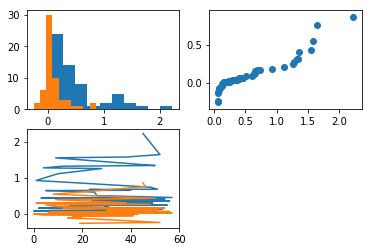

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(data1)
_ = ax1.hist(data1)

plt.plot(data2)
_ = ax1.hist(data2)

ax2.scatter(data1, data2)

### Hypothesis 2 ##
The second hypothesis one is to demonstrate the relation between demand plan accuracy and the seasonality. e.g.: during periods 4,5,6 and 7 the accuracy will improve versus high seasonality, therefore using this parameter will increase the accuracy to make predicition on the forecast error

In [35]:
#identify the unique variables contained in the field "Per"
df_SFA['Per'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

this field will be transformed to one hot label encoder, in such a way that the high season is labeled as "1" and low season will be labeled as "0"


In [36]:
#Re engineering features for low season using a dictionary:

season_map ={0: 0, 1: 0, 
             2: 0, 3: 0, 
             4: 1, 5: 1, 6:  1,
             7: 1, 8: 0, 
             9: 0, 10: 0, 11: 0, 12: 0}
    
df_SFA['Per_Encode'] = df_SFA['Per'].map(season_map)

In [37]:
#sanity check for these transformations:
df_SFA['Per_Encode'].unique() 

array([0, 1], dtype=int64)

In [38]:
# I will compare the linear regression to make predictions using the variables from the dataset and then compare the results
#with a dataset including the new engineered variable(Per Encode)

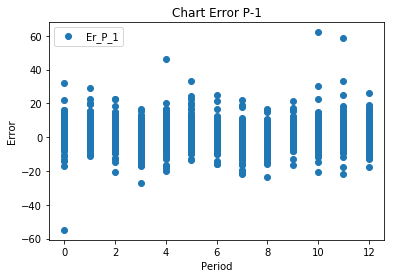

In [39]:
df_SFA.plot(x='Per', y='Er_P_1', style='o')  
plt.title('Chart Error P-1')  
plt.xlabel('Period')  
plt.ylabel('Error')  
plt.show()

In [40]:
X = df_SFA[['Per', 'Canal', 'Tipo', 'Brand','Buss']].values 
y = df_SFA['Er_P_1'].values #attributes of the data

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


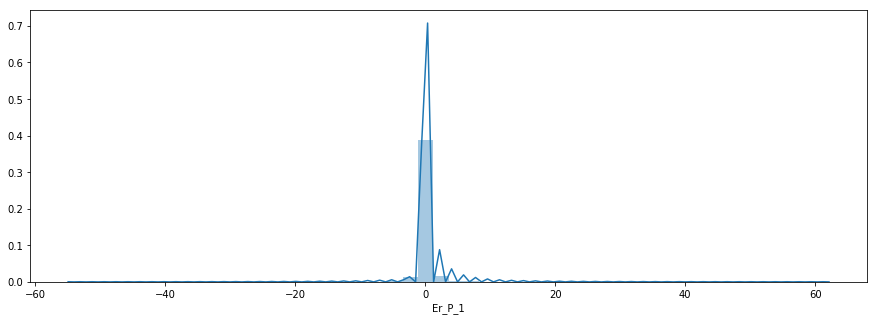

In [41]:
plt.figure(figsize=(15,5))
plt.tight_layout()
seabornInstance.distplot(df_SFA['Er_P_1'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#Now that we have trained our algorithm, it’s time to make some predictions:

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

0.15556410749705368
[ 0.00208013  0.00699918 -0.07474357  0.00023463 -0.00398683]


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted1': y_pred.flatten()})
df1 = df.head(100)

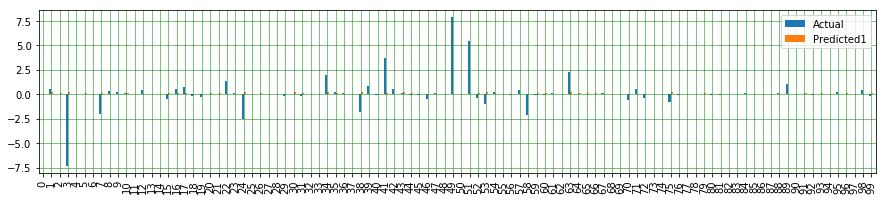

In [48]:
df1.plot(kind='bar',figsize=(15,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46568534965816605
Mean Squared Error: 1.8083717052664419
Root Mean Squared Error: 1.3447571175741893


Repeating ths process for a dataset which includes the parameter engineered to describe the "low season", the results are as follow:

In [50]:
X = df_SFA[['Per', 'Canal', 'Tipo', 'Brand','Buss','Per_Encode']].values 
y = df_SFA['Er_P_1'].values #attributes of the data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

0.16614902693108322
[ 0.00243701  0.00745695 -0.07477507  0.00023064 -0.00370492 -0.03821968]


In [54]:
y_pred = regressor.predict(X_test)

In [55]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted2': y_pred.flatten()})
df2 = df.head(100)


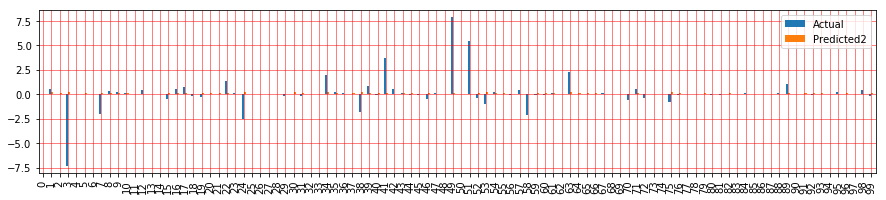

In [56]:
df2.plot(kind='bar',figsize=(15,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46604010672151536
Mean Squared Error: 1.8087574209105575
Root Mean Squared Error: 1.344900524540963


From the previous result, it is possible to conclude that the inclusion o the variable "Per_Encode" to assess the relevance of the seasonality in the forecast accuracy is minimum:

                                 Including Seasonality    Not Including Seasonality
    - Mean Absolute Error:       0.466                    0.465
    - Mean Squared Error:        1.8087                   1.8083
    - Root Mean Squared Error:   1.3449                   1.3447
    
#### Conclusion: Engineering an additional parameter to model hgh seasonality does not contribute significatively to predict the forecast accuracy ####

### Hypothesis 3 ##
The third hypothesis will be proven through the definition of clusters using unsupervised learning. 

The steps to demonstrate how many clusters can be idenified in the data will be:

1) Perform Dimensionality Reduction: Using sklearn's PCA class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. At the starting point, all components are computedso there's enough features to see the general trend in variability.

Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's plot() function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

2) Applying clustering to the data using sklearn's KMeans class to perform k-means clustering on the PCA-transformed data.
Then, computing the average difference from each point to its assigned cluster's center. I will perform thesetwo steps for a number of different cluster counts. 

Once I have selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. 

As a reference, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

In [99]:
# compute possible scaling with temporarily removing missing values
scaler = StandardScaler()
scaler.fit(df_SFA.dropna(axis=0))

# imput missing values with mean
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
df_SFA_impute = imp.fit_transform(df_SFA)

In [100]:
# Apply feature scaling to the forecast data.
# transform data with the fitted scaler
df_SFA_scale = scaler.transform(df_SFA_impute)
df_SFA_scale = pd.DataFrame(df_SFA_scale, columns=df_SFA.columns)
df_SFA_scale.describe()

,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Tipo,Brand,Sub_Fam,Buss,...,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3,Per_Encode
count,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,...,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04,6.749200e+04
mean,8.094670e-13,1.987124e-13,-1.231797e-13,-3.169805e-14,-7.471659e-16,-2.424850e-16,-7.972754e-15,-6.990793e-17,-1.151680e-15,-1.317407e-15,...,3.630317e-16,-1.320633e-15,1.495778e-15,-1.472957e-15,-4.326876e-15,-1.312629e-15,-1.465084e-15,1.575848e-15,1.738691e-15,1.316789e-13
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.044211e+00,-1.547377e+00,-2.562898e+00,-1.830331e+00,-1.875970e+00,-1.252600e+00,-1.885625e+00,-2.359488e+00,-1.897524e+00,-7.084236e-01,...,-1.000443e+01,-3.389273e-01,-3.272994e-01,-3.877197e+01,-2.881286e+01,-1.546571e+02,-1.480284e+02,-1.562432e+02,-1.496812e+02,-7.742172e-01
25%,-1.044211e+00,-9.475414e-01,-6.549300e-01,-1.064892e+00,-8.136170e-01,-8.463429e-01,-6.123552e-01,-5.889474e-01,-8.279015e-01,-7.084236e-01,...,-2.705477e-01,-3.256160e-01,-3.136496e-01,-1.043228e-01,-9.107752e-02,-2.729071e-02,-1.983202e-02,-1.265408e-02,5.294743e-04,-7.742172e-01
50%,9.576607e-01,-4.778812e-02,-1.894059e-02,4.659865e-01,1.306972e-01,-2.481638e-01,6.609150e-01,2.393186e-02,3.602466e-02,-7.084236e-01,...,-2.388874e-01,-2.720186e-01,-2.638279e-01,-6.427622e-02,-4.992861e-02,5.324867e-02,6.545032e-02,4.109616e-02,4.068693e-02,-7.742172e-01
75%,9.576607e-01,8.519651e-01,6.170488e-01,7.211329e-01,8.979525e-01,6.834264e-01,6.609150e-01,8.411043e-01,8.588115e-01,9.420338e-01,...,-1.069602e-01,-8.616109e-02,-8.908846e-02,2.392035e-02,3.123675e-02,1.596335e-01,1.589076e-01,1.074516e-01,1.106277e-01,1.291627e+00
max,9.576607e-01,2.051636e+00,1.253038e+00,9.762792e-01,1.488149e+00,2.563418e+00,6.609150e-01,1.930667e+00,1.558180e+00,2.592491e+00,...,4.719053e+01,4.582143e+01,3.659717e+01,4.374358e+01,3.508642e+01,1.686877e+01,1.615254e+01,1.275050e+00,5.583236e+00,1.291627e+00


In [101]:
df_SFA_scale.head()

,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Tipo,Brand,Sub_Fam,Buss,...,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3,Per_Encode
0,0.957661,-1.547377,-0.65493,0.21084,-0.518519,-1.199367,0.660915,-0.316557,-1.321574,1.767263,...,-0.272078,-0.295010,-0.230485,-0.022597,0.042198,0.159634,0.158908,-0.012654,0.000529,-0.774217
1,0.957661,-1.547377,-0.65493,0.21084,-0.518519,-1.190961,0.660915,-0.316557,-1.321574,1.767263,...,-0.272078,-0.295010,-0.196373,-0.022597,0.074657,0.159634,0.158908,-0.012654,0.000529,-0.774217
2,0.957661,-1.547377,-0.65493,0.21084,-0.518519,-1.168547,0.660915,-0.316557,-0.827902,1.767263,...,0.342843,-0.207265,-0.087701,0.060676,0.178067,0.008753,0.024453,0.139922,0.136623,-0.774217
3,0.957661,-1.547377,-0.65493,0.21084,-0.518519,-1.165745,-1.885625,-0.316557,-0.827902,1.767263,...,0.240356,0.525623,0.459178,0.756214,0.698462,0.054856,0.061319,0.093301,0.099307,-0.774217
4,0.957661,-1.547377,-0.65493,0.21084,-0.518519,-1.162943,0.660915,-0.316557,-0.169672,1.767263,...,0.226122,0.078591,-0.224578,-0.460516,-0.147676,-0.060400,-0.008441,0.090841,0.143476,-0.774217


In [102]:
# Apply PCA to the data.

from sklearn.decomposition import PCA
pca = PCA()
SFA_pca = pca.fit_transform(df_SFA)

In [103]:
# check components number should be the same as total features
components_total = len(pca.explained_variance_ratio_)
# generate sequence for plotting
components = np.arange(components_total)

Text(0.5,1,'Cumulative Explained Variance vs No. of Principal Components')

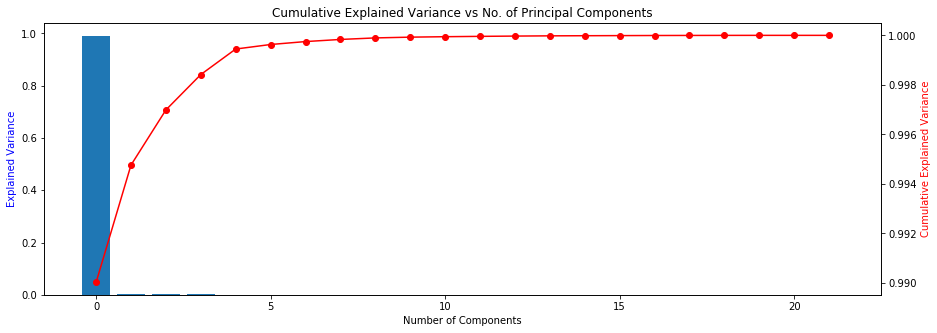

In [104]:
# Investigate the variance accounted for by each principal component.
# refer to this blog:https://github.com/S-Tabor/udacity-customer-segmentation-project/blob/master/identify_customer_segments_final.ipynb
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(components,pca.explained_variance_ratio_)
ax1.set_ylabel('Explained Variance', color="blue")
ax1.set_xlabel('Number of Components')

ax2 = ax1.twinx() 
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color="red",marker='o')
ax2.set_ylabel('Cumulative Explained Variance', color="red")
plt.title("Cumulative Explained Variance vs No. of Principal Components")

In [161]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_4 = PCA(n_components=5)
dem_pca_4 = pca_4.fit_transform(df_SFA)
dem_pca_4_df = pd.DataFrame(dem_pca_4)

print(dem_pca_4_df.shape)
dem_pca_4_df.head()

(67492, 5)


,0,1,2,3,4
0,-427.739732,-36.230490,9.293184,-3.980083,-0.835585
1,-424.739930,-36.199469,9.296689,-3.982982,-0.836066
2,-416.856613,-24.553871,8.957012,-0.803795,-0.906778
3,-415.858532,-24.533908,8.947030,-0.813754,-0.918104
4,-415.009913,-9.122098,8.520505,3.458643,-0.560821


In [162]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# check general weights condition
weights = pd.DataFrame(np.round(pca_4.components_, 4), columns = df_SFA.columns)
print(weights.shape)
weights.head()

(5, 22)


,Year,Per,Canal,Ch,Gpo_Plan,Dmd_Unit,Tipo,Brand,Sub_Fam,Buss,...,Fac_T,Abs_Er_P_1,Abs_Er_P_3,Er_P_1,Er_P_3,Bias_P_1,Bias_P_3,SFA_P_1,SFA_P_3,Per_Encode
0,-0.0002,-0.0004,-0.0012,-0.0003,0.0018,0.9999,0.0005,-0.0036,-0.0096,-0.0014,...,-0.0003,-0.0003,-0.0004,-0.0001,-0.0001,0.0001,0.0000,-0.0001,-0.0001,0.0001
1,0.0005,-0.0025,0.0146,0.0135,-0.0385,0.0103,-0.0024,0.2652,0.9631,0.0020,...,0.0011,0.0020,0.0024,0.0006,0.0006,-0.0035,-0.0020,-0.0022,-0.0013,0.0004
2,-0.0002,-0.0043,-0.0027,-0.0358,-0.9980,0.0013,-0.0004,-0.0415,-0.0279,0.0018,...,-0.0036,-0.0043,-0.0054,-0.0017,-0.0020,-0.0025,-0.0028,-0.0043,-0.0046,-0.0004
3,0.0009,0.0008,0.0077,0.0105,0.0323,-0.0009,0.0029,-0.9632,0.2662,-0.0056,...,-0.0020,-0.0021,-0.0019,-0.0001,0.0001,-0.0034,-0.0036,-0.0046,-0.0054,0.0001
4,0.0009,0.0004,0.0024,0.0072,0.0067,-0.0001,-0.0001,0.0074,-0.0065,-0.0001,...,-0.0001,0.0015,0.0016,-0.0051,-0.0061,-0.4866,-0.5193,-0.4800,-0.5127,0.0003


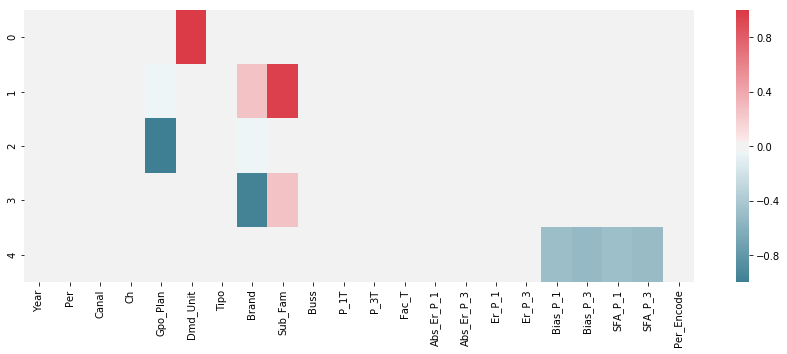

In [163]:
# check general weights condition
f, ax = plt.subplots(figsize=(15, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(weights,cmap=cmap)

In [164]:
def get_cpn_feat_wgt(pca,df_SFA,cpn_num):
    """Give feature weight of n-th component of pca object
    
    Args:
    pca: pca object. The fitted pca. 
    df_SFA: data frame. Original feature data frame.
    cpn_num: int. n-th component.
    
    Returns:
    weight_n: data frame. Feature weight of n-th component.
    """
    
    weights = pd.DataFrame(np.round(pca.components_, 4), columns = df_SFA.columns)
    weight_n = weights.iloc[cpn_num - 1, :].sort_values()
    weight_n = weight_n.to_frame()
    weight_n.reset_index(level=0, inplace=True)
    weight_n.columns = ['colname','weight']
    return weight_n

In [165]:
def get_topn_feat(cpn_feat_wgt,n=5):
    """Give feature weight of n-th component of pca object
    
    Args:
    cpn_feat_wgt: data frame. The feature weight of a component.
    n: int. The number of top and tail features we want to see.
    
    Returns:
    top_n: data frame. Top N positive and N negative features and corresponding weight.
    """
    tail_n = cpn_feat_wgt.head(n).reset_index(drop=True)
    head_n = cpn_feat_wgt.tail(n).sort_values(by='weight',ascending=False).reset_index(drop=True)
    top_n = pd.concat([head_n, tail_n], axis=1)
    top_n.columns = ['top_pos_col','top_pos_col_weight','top_neg_col','top_neg_col_weight']
    return top_n

In [166]:
cpn_wgt_1st = get_cpn_feat_wgt(pca_4,df_SFA,1)
get_topn_feat(cpn_wgt_1st).style.bar(align='mid')

,top_pos_col,top_pos_col_weight,top_neg_col,top_neg_col_weight
0,Dmd_Unit,0.9999,Sub_Fam,-0.0096
1,Gpo_Plan,0.0018,Brand,-0.0036
2,Tipo,0.0005,Buss,-0.0014
3,Bias_P_1,0.0001,Canal,-0.0012
4,Per_Encode,0.0001,Per,-0.0004


### Interpretation of Principal Component Analysis:

#### Top 5 Positive:
Dmd_Unit: The specific item has a direct impact in the forecast accuracy, and it is a key highlight to organize the priorities to work with the sales team using a ranking of items (using volume as sorting parameter). Focusing on big items will be translated to fixing the forecast error of the business.
Gpo_Plan, Tipo: The specific customers and portfolio type have also a positive incidence in the forecast error, nevertheless they are 500X smaller than focusing on specific items.

#### Top 5 Negative:
Sub_Fam, Brand, Buss: Extremely low impact in the forecast accuracy. All these parameters are relateve to the "product", therefore we can conclude that it is indiferent to analyze the forecast using these parameters.
Canal, Per: Even smaller impact in forecast accuracy. It does not have a weight the moment of the yer (Period) or the sales channel which is being forecasted.

In [167]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
cpn_wgt_2nd = get_cpn_feat_wgt(pca_4,df_SFA,2)
get_topn_feat(cpn_wgt_2nd).style.bar(align='mid')

,top_pos_col,top_pos_col_weight,top_neg_col,top_neg_col_weight
0,Sub_Fam,0.9631,Gpo_Plan,-0.0385
1,Brand,0.2652,Bias_P_1,-0.0035
2,Canal,0.0146,Per,-0.0025
3,Ch,0.0135,Tipo,-0.0024
4,Dmd_Unit,0.0103,SFA_P_1,-0.0022


In [168]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
cpn_wgt_3rd = get_cpn_feat_wgt(pca_4,df_SFA,3)
get_topn_feat(cpn_wgt_3rd).style.bar(align='mid')

,top_pos_col,top_pos_col_weight,top_neg_col,top_neg_col_weight
0,Buss,0.0018,Gpo_Plan,-0.998
1,Dmd_Unit,0.0013,Brand,-0.0415
2,Year,-0.0002,Ch,-0.0358
3,Per_Encode,-0.0004,Sub_Fam,-0.0279
4,Tipo,-0.0004,Abs_Er_P_3,-0.0054


#### Top 5 Components

Given the small amount of parameters within the dataset, the conclusions from the second and third set of components are quickly overlapping and will not drive to valid analytical conclusions.

In [169]:
# For different cluster counts run k-means clustering on the data 
# and compute the average within-cluster distances to select a final number of clusters
from sklearn.cluster import KMeans
from scipy.stats import itemfreq, chisquare

max_cluster = 20
scores = {}
for i in range(2, max_cluster):
    # run k-means clustering on the data and keep the score
    print(i)
    scores[i] = np.abs(KMeans(n_clusters=i).fit(dem_pca_4).score(dem_pca_4))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


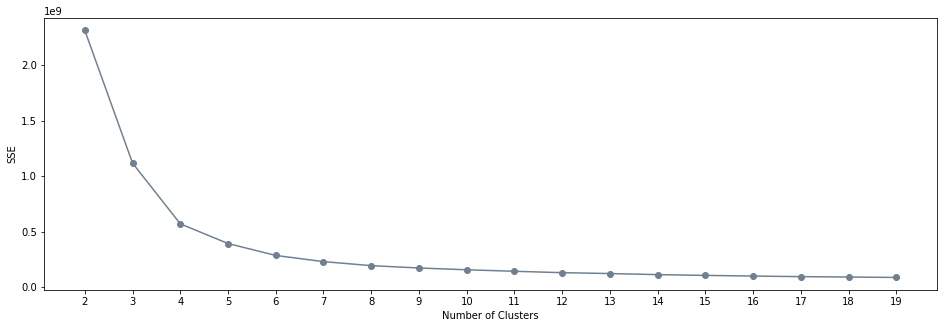

In [170]:
# Investigate the change in within-cluster distance across number of clusters.
fig, ax = plt.subplots(figsize=(16,5))    
ax = pd.Series(scores).plot(marker='o', color='slategray')
ax.set_xticks(np.arange(2, max_cluster), minor=False);
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE");

In [171]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_model = KMeans(n_clusters=6, n_jobs=-1, random_state=0).fit(dem_pca_4)
dem_pca_4_df["labels"] = kmeans_model.labels_

In [172]:
print(kmeans_model.labels_)
print(dem_pca_4_df.head())

[3 3 3 ... 5 5 3]
            0          1         2         3         4  labels
0 -427.739732 -36.230490  9.293184 -3.980083 -0.835585       3
1 -424.739930 -36.199469  9.296689 -3.982982 -0.836066       3
2 -416.856613 -24.553871  8.957012 -0.803795 -0.906778       3
3 -415.858532 -24.533908  8.947030 -0.813754 -0.918104       3
4 -415.009913  -9.122098  8.520505  3.458643 -0.560821       3


#### Given the previous results, I will choose 6 clusters

With these clusters and cluster centers for the forecasted data, it's time to see how the customer data maps on to those clusters. This stage is not about re-fitting all of the models to the customer data. Instead, yI will use the fits from the forecasted data to cluster the customer data. 

In [173]:
### Clustering

def trans_data(df,imp,scaler,pca):
    """Apply transform data procedure to data frame
    
    Args:
    df: data.frame. The data to be transformed
    imp:imputer object. The trained imputer
    scaler: scaler object. The trained scaler
    pca: pca object. The trianed pca
    
    Returns:
    df_pca: data.frame. The transformed data frame
    """
    df_imp = imp.transform(df)
    
    df_scaler = scaler.transform(df_imp)
    df_scaler = pd.DataFrame(df_scaler,columns = df.columns)
    
    df_pca = pd.DataFrame(pca.transform(df_scaler))
    return df_pca

In [174]:
cus_pca = trans_data(df_SFA,imp,scaler,pca_4)
print(cus_pca.shape)

(67492, 5)


In [175]:
# Clustering
cus_kmeans = kmeans_model.predict(cus_pca)
cus_pca["labels"] = cus_kmeans
print(np.unique(cus_kmeans))

[3]


In [176]:
def count_group(df,group_name):
    """Compute the proportion of data points in each cluster for the data
    
    Args:
    df: data.frame. The clustered data
    group_name: char. The name of the data 
    
    Returns:
    per_group: data.frame. The percentage of each group of the data
    
    """
    per_group = pd.DataFrame(itemfreq(df["labels"]),columns=['label','freq'])
    per_group['group'] = group_name
    per_group['freq'] = per_group['freq']/per_group['freq'].sum()
    return per_group

In [177]:
pop_per_group = count_group(dem_pca_4_df,'pop')
cus_per_group = count_group(cus_pca,'cus')
total_per_group = pop_per_group.append(cus_per_group)
print(total_per_group)

   label      freq group
0      0  0.181873   pop
1      1  0.091848   pop
2      2  0.125215   pop
3      3  0.280522   pop
4      4  0.138090   pop
5      5  0.182451   pop
0      3  1.000000   cus


C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if sys.path[0] == '':


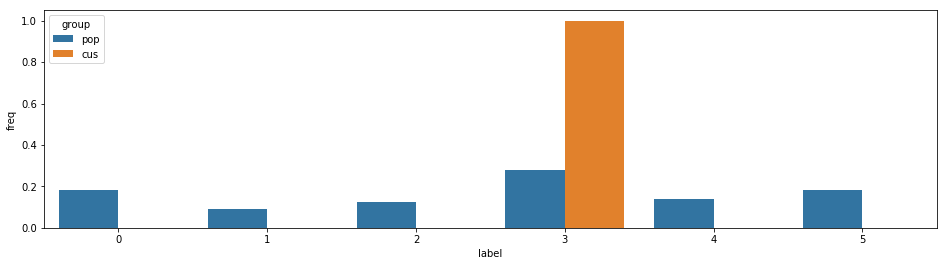

In [178]:
# make a visual plot
fig, ax = plt.subplots(figsize=(16,4))    
ax=sns.barplot(x='label', y='freq', hue='group', data=total_per_group)

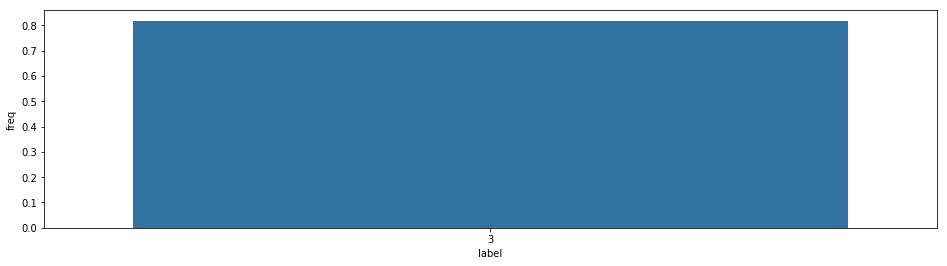

In [179]:
# make a visual plot about customer freq - population freq
fig, ax = plt.subplots(figsize=(16,4))
ax=sns.barplot(x=cus_per_group.label, y=cus_per_group.freq - pop_per_group.freq)

In [180]:
# better understanding of clusters.
def map_cluster_to_feats(kmeans, df, cnum):
    '''Map pca weights to  individual features
    and return two pd.Series on with the highest
    positive weights and one with the lowest negative
    weights
    
    Args:
    kmeans: kmeans object.
    df: data frame. The pca data frame of original data.
    cnum: int. The n-th cluster.
    
    Returns:
    top_pca_feat: data frame. The top N positive and negative pca features. 
    '''
    
    # get coordinates of cluster centers
    weights = pd.DataFrame(np.round(kmeans.cluster_centers_, 4), columns=df.keys())
    # the centroid of cluster cnum
    centroid = weights.iloc[cnum, :]
    # postive pca feature
    cent_pos = centroid[centroid > 0].sort_values(ascending=False).to_frame()
    cent_pos.reset_index(level=0, inplace=True)
    cent_pos.columns = ['top_pos_col','top_pos_col_weight']
    # negative pca feature
    cent_neg = centroid[centroid < 0].sort_values(ascending=True).to_frame()
    cent_neg.reset_index(level=0, inplace=True)
    cent_neg.columns = ['top_neg_col','top_neg_col_weight']
    # concat postive and negative
    top_pca_feat = pd.concat([cent_pos, cent_neg], axis=1)
    top_pca_feat['top_neg_col'] = top_pca_feat['top_neg_col'].apply(str)
    top_pca_feat['top_pos_col'] = top_pca_feat['top_pos_col'].apply(str)
    return top_pca_feat

In [181]:

top_pca_feat = map_cluster_to_feats(kmeans_model, cus_pca.iloc[:, :-1], 2)
top_pca_feat.style.bar(align='mid')
#pca component 0 has positive effect and component 3, 1 has negative effect

,top_pos_col,top_pos_col_weight,top_neg_col,top_neg_col_weight
0,0,404.766,2.0,-0.213
1,1,5.609,nan,nan
2,3,3.8854,nan,nan
3,4,0.0983,nan,nan


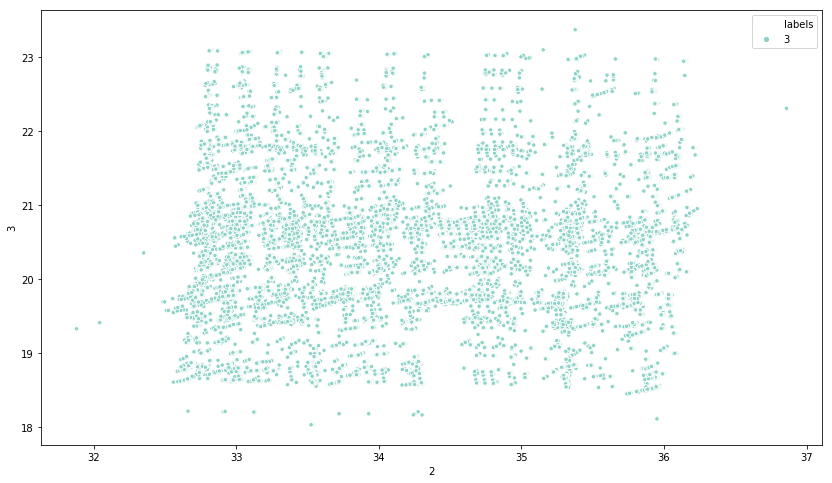

In [182]:
# how clusters are distributed along the principal components
fig, ax = plt.subplots(figsize=(14,8))    
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=cus_pca[2], y=cus_pca[3], 
                hue=cus_pca["labels"],size=cus_pca["labels"],palette="Set3",
                legend="full")

From the previous results, it is possible to conclude that this dataset has 5 key componentes, but one of them is having a much major impact in the overall result (forecast error).

It is also possible to conclude as well that the number of clusters fr this dataset is 6, which are a match for the number of channels, but given the dominance of one component, the analyics and he visualization are not helping to drive conclusions.

#### Conclusion: Clusterization of the forecast error is heavily dependant of each product ("dmd unit"), therefore clustering is not producing a meaningful insight to manage differently the analysis of data. 